In [1]:

from genericpath import isfile
import os
import sys
import shutil
import subprocess
import numpy as np
from datetime import datetime
from joblib import Parallel, delayed




EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}


# %%

def get_input_files(emdb_pdb, dataset_type):
    
    if dataset_type == "MB":
        suffix = "_epsilon_MB"
    elif dataset_type == "MF":
        suffix = "_epsilon_MF"
    elif dataset_type == "hybrid":
        suffix = "_epsilon_MBI"
    else:
        suffix = ""
        data_folder_alpha = "/home/abharadwaj1/shortcuts/locscale_mapdata/collection_dataset_3"
    data_folder_epsilon = "/home/abharadwaj1/shortcuts/locscale_mapdata/dataset_attempt{}".format(suffix)
    emdb_pdb_path = os.path.join(data_folder_epsilon, emdb_pdb)
    emdb, pdb = emdb_pdb.split("_")
    try:
        symmetry = symmetry_dictionary[emdb]
    except KeyError:
        print("No symmetry information for {}".format(emdb))
        print(emdb_pdb)
        raise KeyError

    folder_containing_files = os.path.join(emdb_pdb_path)
    folder_containing_phenix_and_deposited_maps = f"/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores/{emdb_pdb}/"
    phenix_sharpened_map_path_1 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_phenix_sharpened.map".format(emdb))
    phenix_sharpened_map_path_2 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_Phenix.map".format(emdb))
    
    atomic_model_mask = f"/home/abharadwaj1/dev/map_sharpening/locscale_analysis/locscale_analysis_files/locscale_mapdata/collection_dataset_3/{emdb_pdb}/emd_{emdb}_MB_locscale_processing_files/PDB_{pdb}_unrefined_shifted_servalcat_refined_model_mask.mrc"

    if os.path.exists(phenix_sharpened_map_path_1):
        phenix_sharpened_map_path = phenix_sharpened_map_path_1
    elif os.path.exists(phenix_sharpened_map_path_2):
        phenix_sharpened_map_path = phenix_sharpened_map_path_2
    else:
        phenix_sharpened_map_path = "none"

    #deposited_map = f"/tudelft/abharadwaj1/staff-umbrella/ajlab/students/MEP/2021/RB/mapdata/{emdb_pdb}/EMDBmaps/sharpened_maps/emd_{emdb}_deposited.map"
    deposited_map = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_deposited.map".format(emdb))

    model_based_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_locscale{}.mrc".format(emdb, suffix))
    model_free_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_free_locscale{}.mrc".format(emdb, suffix))
    model_based_integrated_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_integrated_locscale{}.mrc".format(emdb, suffix))

    MB_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_locscale_processing_files{}".format(emdb, suffix))
    refined_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined.pdb".format(pdb))
    refined_shifted_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors.pdb".format(pdb))
    refined_model_map_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors_4locscale.mrc".format(pdb))


    MF_processing_file = os.path.join(folder_containing_files, "emd_{}_MF_locscale_processing_files{}".format(emdb, suffix))
    
    refined_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition.pdb".format(emdb))
    refined_shifted_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors.pdb".format(emdb))
    
    if symmetry == "C1":
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc".format(emdb))
    else:
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(emdb, symmetry))
    
    MB_integrated_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_integrated_locscale_processing_files{}".format(emdb, suffix))
    refined_integrated_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition.pdb".format(pdb))
    refined_integrated_shifted_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors.pdb".format(pdb))
    if symmetry == "C1":
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale.mrc".format(pdb))
    else:
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(pdb, symmetry))
    
    if dataset_type == "MB":
        target_processing_file = MB_processing_file
        target_pdb_path = refined_pdb_path
        target_shifted_pdb_path = refined_shifted_pdb_path
        target_model_map_path = refined_model_map_path
        target_sharpened_file = model_based_locscale_file
    elif dataset_type == "MF":
        target_processing_file = MF_processing_file
        target_pdb_path = refined_pseudomodel_path
        target_shifted_pdb_path = refined_shifted_pseudomodel_path
        target_model_map_path = refined_pseudo_model_map_path
        target_sharpened_file = model_free_locscale_file
    elif dataset_type == "hybrid":
        target_processing_file = MB_integrated_processing_file
        target_pdb_path = refined_integrated_pdb_path
        target_shifted_pdb_path = refined_integrated_shifted_pdb_path
        target_model_map_path = refined_integrated_model_map_path
        target_sharpened_file = model_based_integrated_locscale_file
        


    unsharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap.mrc".format(int(emdb)))
    halfmap_1_file = os.path.join(target_processing_file, "emd_{}_half_map_1.map".format(emdb))
    halfmap_2_file = os.path.join(target_processing_file, "emd_{}_half_map_2.map".format(emdb))
    input_pseudomodel_path = os.path.join(target_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_uniform_biso.pdb".format(emdb))
    globally_sharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap_global_sharpened_filtered.mrc".format(int(emdb)))
    mask_file = os.path.join(target_processing_file, "emd_{}_FDR_confidence_final.map".format(emdb))
        
    input_files_emdb = {
        "model_based_locscale_file": model_based_locscale_file,
        "model_free_locscale_file": model_free_locscale_file,
        "model_based_integrated_locscale_file": model_based_integrated_locscale_file,
        "refined_pdb_path": refined_pdb_path,
        "refined_shifted_pdb_path": refined_shifted_pdb_path,
        "refined_pseudomodel_path": refined_pseudomodel_path,
        "refined_integrated_pdb_path": refined_integrated_pdb_path,
        "unsharpened_map_file": unsharpened_map_file,
        "globally_sharpened_map_file": globally_sharpened_map_file,
        "mask_file": mask_file,
        "halfmap_1_file": halfmap_1_file,
        "halfmap_2_file": halfmap_2_file,
        "refined_model_map_path": refined_model_map_path,
        "refined_pseudo_model_map_path": refined_pseudo_model_map_path,
        "refined_integrated_model_map_path": refined_integrated_model_map_path,
        "target_processing_file": target_processing_file,
        "target_pdb_path": target_pdb_path,
        "target_shifted_pdb_path": target_shifted_pdb_path,
        "target_model_map_path": target_model_map_path,
        "target_sharpened_file": target_sharpened_file,
        "phenix_sharpened_map_path": phenix_sharpened_map_path,
        "deposited_map_path": deposited_map,
        "atomic_model_mask" : atomic_model_mask,
        "input_pseudomodel_path": input_pseudomodel_path,
    }

    # Check if all input files exist and if not then change the value of the dictionary to None
    for key, value in input_files_emdb.items():
        if not os.path.exists(value):
            input_files_emdb[key] = None
    return input_files_emdb

# %%
# %%
# Load the input files for the EMDBs
input_files_emdb_epsilon_MB = {}
input_files_emdb_epsilon_MF = {}
input_files_emdb_epsilon_hybrid = {}
emdb_pdbs_present = []
for emdb_pdb in EMDB_PDB_ids_all:
    input_files_emdb_epsilon_MF[emdb_pdb] = get_input_files(emdb_pdb, "MF")
    required_files = ["halfmap_1_file", "halfmap_2_file", "input_pseudomodel_path"]
    print("Checking if all required files exist for {}".format(emdb_pdb))
    print("===============================================")
    # Check if all required files exist and print a warning if not
    missing_files = []
    for required_file in required_files:
       
        if input_files_emdb_epsilon_MF[emdb_pdb][required_file] is None :
            print("\t{} missing".format(required_file))
            missing_files.append((required_file, "MF"))

    if len(missing_files) == 0:
        emdb_pdbs_present.append(emdb_pdb)

# Number of EMDBs with all required files
print("Number of EMDBs with all required files: {}".format(len(emdb_pdbs_present)))
print("===============================================")
print("Number of EMDBs with missing files: {}".format(len(EMDB_PDB_ids_all) - len(emdb_pdbs_present)))

        
print("===============================================")

def copy_files_to_folder(file, folder):
    # if copied file already exists then ignore 
    test_copied_path = os.path.join(folder, os.path.basename(file))
    if os.path.exists(test_copied_path):
        print("File already exists: {}".format(test_copied_path))
        return test_copied_path
    
    if not os.path.exists(folder):
        os.makedirs(folder)
    new_path = shutil.copy(file, folder)
    return new_path



Checking if all required files exist for 0026_6gl7
Checking if all required files exist for 7573_6crv
Checking if all required files exist for 0665_6oa9
Checking if all required files exist for 0038_6gml
Checking if all required files exist for 0071_6gve
Checking if all required files exist for 0093_6gyn
Checking if all required files exist for 0094_6gyo
Checking if all required files exist for 0132_6h3c
Checking if all required files exist for 0234_6hjn
Checking if all required files exist for 0408_6nbd
Checking if all required files exist for 0415_6nbq
Checking if all required files exist for 4288_6fo2
Checking if all required files exist for 0452_6nmi
Checking if all required files exist for 0490_6nr8
Checking if all required files exist for 0492_6nra
Checking if all required files exist for 0567_6o0h
Checking if all required files exist for 0589_6nmi
Checking if all required files exist for 0592_6o1m
Checking if all required files exist for 0776_6ku9
Checking if all required files 

In [2]:
from locscale.include.emmer.ndimage.map_utils import load_map
from tqdm import tqdm

data_folder = "/home/abharadwaj1/dev/current_focus/refinement_only/using_optimised_parameters_new_refinement"

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

get_inputs_emdb = {}
for emdb_pdb in tqdm(EMDB_PDB_ids_all, desc="Copying files"):
    emdb, pdb = emdb_pdb.split("_")

    emdb_folder = os.path.join(data_folder, emdb_pdb)

    copied_paths = {}
    input_pdb_path = input_files_emdb_epsilon_MF[emdb_pdb]["input_pseudomodel_path"]
    input_halfmap_1_path = input_files_emdb_epsilon_MF[emdb_pdb]["halfmap_1_file"]
    input_halfmap_2_path = input_files_emdb_epsilon_MF[emdb_pdb]["halfmap_2_file"]

    if input_pdb_path is None or input_halfmap_1_path is None or input_halfmap_2_path is None:
        print("Skipping {}".format(emdb_pdb))
        continue

    copied_pdb_path = copy_files_to_folder(input_files_emdb_epsilon_MF[emdb_pdb]["input_pseudomodel_path"], emdb_folder)
    copied_halfmap_1_path = copy_files_to_folder(input_files_emdb_epsilon_MF[emdb_pdb]["halfmap_1_file"], emdb_folder)
    copied_halfmap_2_path = copy_files_to_folder(input_files_emdb_epsilon_MF[emdb_pdb]["halfmap_2_file"], emdb_folder)
    emmap, apix = load_map(copied_halfmap_1_path)
    copied_paths["copied_pdb_path"] = copied_pdb_path
    copied_paths["copied_halfmap_1_path"] = copied_halfmap_1_path
    copied_paths["copied_halfmap_2_path"] = copied_halfmap_2_path
    
    copied_paths["apix"] = apix
    get_inputs_emdb[emdb_pdb] = copied_paths

    





Copying files:  56%|█████▌    | 72/129 [00:24<00:08,  6.42it/s]

Skipping 4728_6r5k


Copying files:  59%|█████▉    | 76/129 [00:26<00:17,  2.97it/s]

Skipping 4907_6rkd


Copying files:  76%|███████▌  | 98/129 [00:32<00:12,  2.40it/s]

Skipping 0193_6hcg


Copying files:  88%|████████▊ | 113/129 [00:37<00:04,  3.54it/s]

Skipping 9298_6mzc


Copying files:  94%|█████████▍| 121/129 [00:39<00:02,  3.68it/s]

Skipping 3545_5mqf


Copying files: 100%|██████████| 129/129 [00:46<00:00,  2.80it/s]


In [3]:
# Load the optimised parameters
import pickle
import pandas as pd
pickle_file_parameters = "/home/abharadwaj1/dev/current_focus/refinement_only/refinement_parameters_optimisation.pickle"

refinement_parameters_optimisation = pd.read_pickle(pickle_file_parameters)
optimised_parameters = refinement_parameters_optimisation["optimised_parameters"]

In [12]:
import shlex

servalcat_commands = {}
for emdb_pdb in tqdm(get_inputs_emdb.keys(), desc="Creating commands"):
    emdb, pdb = emdb_pdb.split("_")
    copied_pdb_path = get_inputs_emdb[emdb_pdb]["copied_pdb_path"]
    copied_halfmap_1_path = get_inputs_emdb[emdb_pdb]["copied_halfmap_1_path"]
    copied_halfmap_2_path = get_inputs_emdb[emdb_pdb]["copied_halfmap_2_path"]
    apix = get_inputs_emdb[emdb_pdb]["apix"]
    
    resolution = res_dict[emdb]
    # Get the optimised parameters
    try:
        optimised_parameter = optimised_parameters[emdb]
    except KeyError:
        print("No optimised parameters found for {}".format(emdb))
        continue
    adp_restraint_power = optimised_parameter[0]
    adp_restraint_exp_fac = optimised_parameter[1]
    # Create the command
    cmd = ["servalcat","refine_spa_norefmac"]
    cmd.extend(["--halfmaps", shlex.quote(copied_halfmap_1_path), shlex.quote(copied_halfmap_2_path)])
    cmd.extend(["--model", shlex.quote(copied_pdb_path)])
    cmd.extend(["--resolution", str(round(apix*2+0.1,1))])
    cmd.extend(["--hydrogen", "no"])
    cmd.extend(["--fix_xyz"])
    cmd.extend(["--sigma_b", "30"])
    cmd.extend(["--max_dist_for_adp_restraint", "10"])
    cmd.extend(["--adp_restraint_power", str(round(adp_restraint_power,4))])
    cmd.extend(["--adp_restraint_exp_fac", str(round(adp_restraint_exp_fac,4))])
    cmd.extend(["--ncycle", "10"])

    servalcat_commands[emdb_pdb] = cmd


Creating commands: 100%|██████████| 124/124 [00:00<00:00, 22215.78it/s]

No optimised parameters found for 0026
No optimised parameters found for 7573
No optimised parameters found for 0492
No optimised parameters found for 3885
No optimised parameters found for 4746
No optimised parameters found for 4917
No optimised parameters found for 7065
No optimised parameters found for 8960
No optimised parameters found for 9258
No optimised parameters found for 9259
No optimised parameters found for 9931
No optimised parameters found for 9934
No optimised parameters found for 9935
No optimised parameters found for 9939
No optimised parameters found for 9941
No optimised parameters found for 9695
No optimised parameters found for 0257
No optimised parameters found for 0264
No optimised parameters found for 0499
No optimised parameters found for 10401
No optimised parameters found for 20449
No optimised parameters found for 20849
No optimised parameters found for 4611
No optimised parameters found for 4646
No optimised parameters found for 4733
No optimised parameter

In [13]:
servalcat_commands["0038_6gml"]

['servalcat',
 'refine_spa_norefmac',
 '--halfmaps',
 '/home/abharadwaj1/dev/current_focus/refinement_only/using_optimised_parameters_new_refinement/0038_6gml/emd_0038_half_map_1.map',
 '/home/abharadwaj1/dev/current_focus/refinement_only/using_optimised_parameters_new_refinement/0038_6gml/emd_0038_half_map_2.map',
 '--model',
 '/home/abharadwaj1/dev/current_focus/refinement_only/using_optimised_parameters_new_refinement/0038_6gml/emd_0038_FDR_confidence_final_gradient_pseudomodel_uniform_biso.pdb',
 '--resolution',
 '2.6',
 '--hydrogen',
 'no',
 '--fix_xyz',
 '--sigma_b',
 '30',
 '--max_dist_for_adp_restraint',
 '10',
 '--adp_restraint_power',
 '1.6436',
 '--adp_restraint_exp_fac',
 '0.0152',
 '--ncycle',
 '10']

In [14]:
import os
import subprocess
from joblib import Parallel, delayed

def run_command(cmd):
    folder = os.path.dirname(cmd[4])
    # change to the folder
    os.chdir(folder)
    print("Running command: {}".format(" ".join(cmd)))
    print("===============================================")
    try:
        # Run the command
        result = subprocess.run(cmd, capture_output=True, check=True)

        # Print the output
        print(result.stdout.decode("utf-8"))
        os.chdir(data_folder)
    except subprocess.CalledProcessError as err:
        emdb_pdb = cmd[4].split("/")[-2]
        print("Error found in {}".format(emdb_pdb))
        print("ERROR: {}".format(err.stderr.decode("utf-8")))
        print("ERROR: {}".format(err.output.decode("utf-8")))
        print("===============================================")
        os.chdir(data_folder)



    
    

In [ ]:
emdb_pdb_list = list(servalcat_commands.keys())
Parallel(n_jobs=8, verbose=10)(delayed(run_command)(servalcat_commands[emdbpdb]) for emdbpdb in emdb_pdb_list)


In [9]:
cmd[4]

'/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_new_restraint/refinement_only/servalcat_v4_large/9610_6adq/emd_9610_half_map_2.map'

In [12]:
# Analyse the results quickly
from locscale.include.emmer.pdb.pdb_utils import get_bfactors

emd_0038_new_refinement_bfactors = get_bfactors(input_pdb="/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_new_restraint/refinement_only/mini_results/emd0038_refined.pdb")
emd_0038_iterative_refinement_bfactors = get_bfactors(input_pdb="/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_new_restraint/refinement_only/mini_results/emd0038_refined_iterative.pdb")




Text(0, 0.5, 'B-factor')

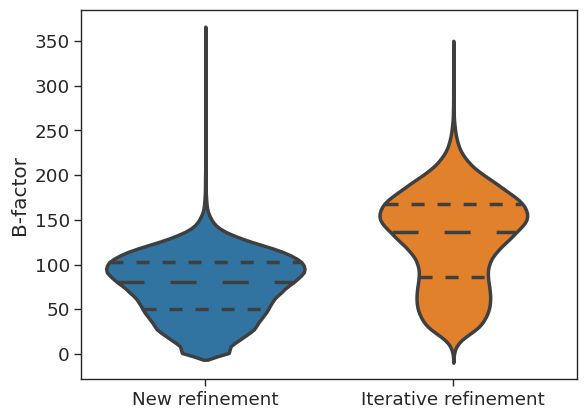

In [13]:
# Plot the B-factors distribution as a violin plot for the new refinement and iterative refinement
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.violinplot(data=[emd_0038_new_refinement_bfactors, emd_0038_iterative_refinement_bfactors], inner="quartile")
plt.xticks([0,1], ["New refinement", "Iterative refinement"])
plt.ylabel("B-factor")



/home/everybody/anaconda3/envs/gemmi_v06/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


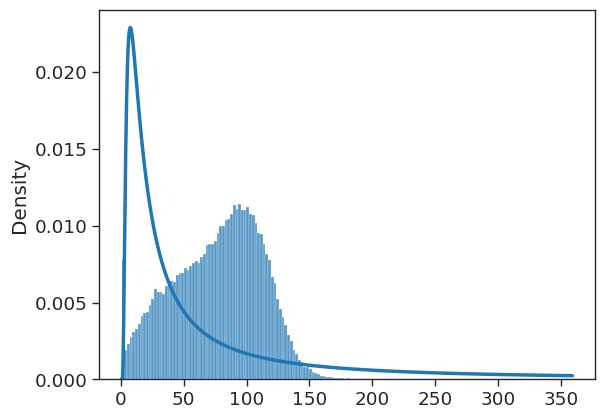

In [15]:
# Plot the Bfactors from iterative refinement and new refinement along with a inverse gamma distribution
import numpy as np
from scipy.stats import invgamma

# Fit the inverse gamma distribution for new refinement
a, loc, scale = invgamma.fit(emd_0038_new_refinement_bfactors, floc=0)
# Plot the inverse gamma distribution as a PPF plot with histplot of the B-factors
min_bfactor_new_refinement = np.min(emd_0038_new_refinement_bfactors)
max_bfactor_new_refinement = np.max(emd_0038_new_refinement_bfactors)
x = np.linspace(min_bfactor_new_refinement, max_bfactor_new_refinement, len(emd_0038_new_refinement_bfactors))
y = invgamma.pdf(x, a, loc, scale)
sns.histplot(emd_0038_new_refinement_bfactors, stat="density", label="New refinement")
plt.plot(x, y, label="Inverse gamma distribution")


In [60]:
a

2.9232204684561105

/home/everybody/anaconda3/envs/gemmi_v06/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Text(0, 0.5, 'Density')

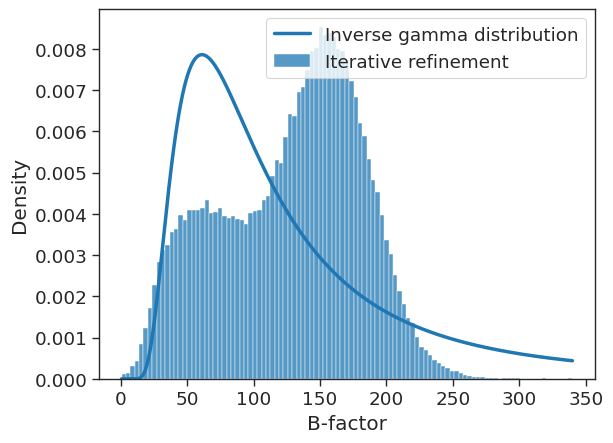

In [16]:
# Fit the inverse gamma distribution for iterative refinement
a, loc, scale = invgamma.fit(emd_0038_iterative_refinement_bfactors, floc=0)
# Plot the inverse gamma distribution as a PPF plot with histplot of the B-factors
min_bfactor_iterative_refinement = np.min(emd_0038_iterative_refinement_bfactors)
max_bfactor_iterative_refinement = np.max(emd_0038_iterative_refinement_bfactors)
x = np.linspace(min_bfactor_iterative_refinement, max_bfactor_iterative_refinement, len(emd_0038_iterative_refinement_bfactors))
y = invgamma.pdf(x, a, loc, scale)
sns.histplot(emd_0038_iterative_refinement_bfactors, stat="density", label="Iterative refinement")
plt.plot(x, y, label="Inverse gamma distribution")
plt.legend()
plt.xlabel("B-factor")
plt.ylabel("Density")


Text(0, 0.5, 'B-factor')

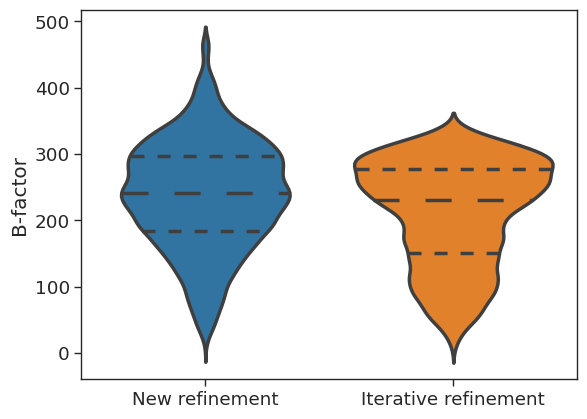

In [17]:
# Plot the B-factors distribution as a violin plot for the new refinement and iterative refinement for EMD 3061
emd_3061_new_refinement_bfactors = get_bfactors(input_pdb="/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_new_restraint/refinement_only/mini_results/emd3061_refined.pdb")
emd_3061_iterative_refinement_bfactors = get_bfactors(input_pdb="/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_new_restraint/refinement_only/mini_results/emd3061_refined_iterative.pdb")

sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.violinplot(data=[emd_3061_new_refinement_bfactors, emd_3061_iterative_refinement_bfactors], inner="quartile")
plt.xticks([0,1], ["New refinement", "Iterative refinement"])
plt.ylabel("B-factor")


/home/everybody/anaconda3/envs/gemmi_v06/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


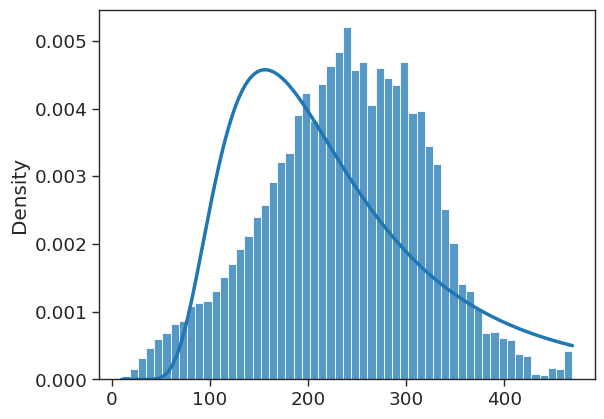

In [55]:
# Plot the Bfactors from iterative refinement and new refinement along with a inverse gamma distribution
import numpy as np

# Fit the inverse gamma distribution for new refinement
a, loc, scale = invgamma.fit(emd_3061_new_refinement_bfactors, floc=0)
# Plot the inverse gamma distribution as a PPF plot with histplot of the B-factors
min_bfactor_new_refinement = np.min(emd_3061_new_refinement_bfactors)
max_bfactor_new_refinement = np.max(emd_3061_new_refinement_bfactors)
x = np.linspace(min_bfactor_new_refinement, max_bfactor_new_refinement, len(emd_3061_new_refinement_bfactors))
y = invgamma.pdf(x, a, loc, scale)
sns.histplot(emd_3061_new_refinement_bfactors, stat="density", label="New refinement")
plt.plot(x, y, label="Inverse gamma distribution")



/home/everybody/anaconda3/envs/gemmi_v06/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


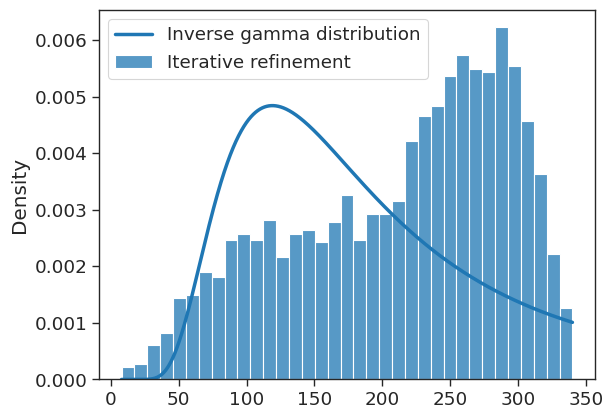

In [56]:
# Fit the inverse gamma distribution for iterative refinement
a, loc, scale = invgamma.fit(emd_3061_iterative_refinement_bfactors, floc=0)
# Plot the inverse gamma distribution as a PPF plot with histplot of the B-factors
min_bfactor_iterative_refinement = np.min(emd_3061_iterative_refinement_bfactors)
max_bfactor_iterative_refinement = np.max(emd_3061_iterative_refinement_bfactors)
x = np.linspace(min_bfactor_iterative_refinement, max_bfactor_iterative_refinement, len(emd_3061_iterative_refinement_bfactors))
y = invgamma.pdf(x, a, loc, scale)
sns.histplot(emd_3061_iterative_refinement_bfactors, stat="density", label="Iterative refinement")
plt.plot(x, y, label="Inverse gamma distribution")
plt.legend()



Text(0, 0.5, 'B-factor')

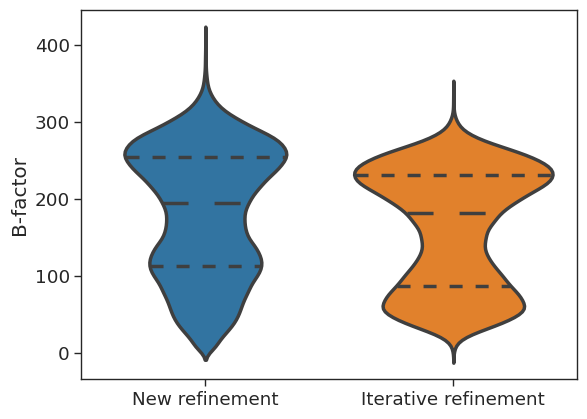

In [18]:
# Plot the B-factors distribution as a violin plot for the new refinement and iterative refinement for EMD 4531
emd_4531_new_refinement_bfactors = get_bfactors(input_pdb="/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_new_restraint/refinement_only/mini_results/emd4531_refined.pdb")
emd_4531_iterative_refinement_bfactors = get_bfactors(input_pdb="/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_new_restraint/refinement_only/mini_results/emd4531_refined_iterative.pdb")

sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.violinplot(data=[emd_4531_new_refinement_bfactors, emd_4531_iterative_refinement_bfactors], inner="quartile")
plt.xticks([0,1], ["New refinement", "Iterative refinement"])
plt.ylabel("B-factor")


In [19]:
len(emd_4531_new_refinement_bfactors)

196679

1671768

In [47]:
b = np.array([1,2,3,4,45],dtype=np.float64)


In [52]:
c=np.expand_dims(b, axis=1)

In [54]:
c[0]

array([1.])

In [ ]:
100,000 * 13 * 8 